### Importing libraries
We are using some libraries in this project including numpy, matplotlib and scikit-learn

In [0]:
# Importing the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import random
import operator

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


### Creating te dataset
Here we are creating the random dataset.
The formula we are using is:      
**y = random(from -3 to 20) + x - 4x^2 + 7x^3**


In [0]:
np.random.seed(0)
x = np.random.normal(0, 1, 20)
y = np.random.normal(0, 1, 20)

### Plotting the dataset
We are using a scatter plot to visualise the data.

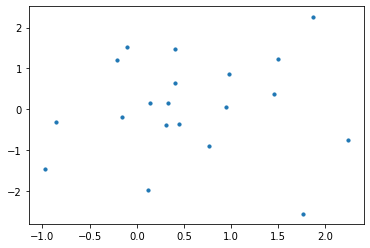

In [3]:
plt.scatter(x,y, s=10)
plt.show()

In [0]:
#Converting data from 1D array to 2D array
x = x[:, np.newaxis]
y = y[:, np.newaxis]

### Doing Linear Regression
In this cell, we are doing linear regression on our generated dataset.

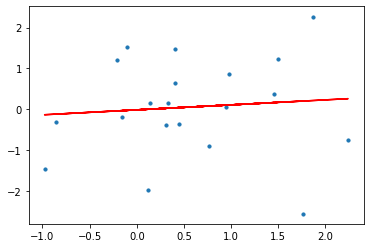

In [5]:
model_lin = LinearRegression()
model_lin.fit(x, y)
y_pred = model_lin.predict(x)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

In [6]:
mse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print(mse)
print(r2)

1.1832766119182259
0.007636444138149345


### Doing Polynomial Regression
In these cells, we are creating doing Polynomial Regression using **scikit-learn**.


In [0]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

In [0]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

### Calculating error
Here we are calculating the mean_square_error and the R2 score.

In [9]:
mse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(mse)
print(r2)

1.1507521092081143
0.061440511342737425


### Visualising results
First we find the function generated by polynomial regression, and then graph the results

In [10]:
print(model.coef_)
print(model.intercept_)

[[ 0.          0.54780984 -0.32901375]]
[0.08832508]


In [11]:
res = "y = f(x) = " + str(model.intercept_[0])

for i,r in enumerate(model.coef_[0]):
    res = res + " + {}*x^{}".format("%.2f" % r, i)

print (res)

y = f(x) = 0.0883250821027936 + 0.00*x^0 + 0.55*x^1 + -0.33*x^2


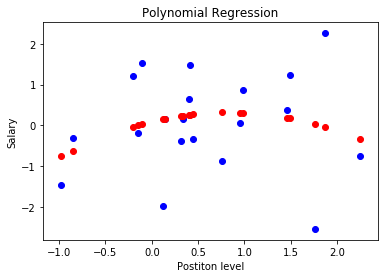

In [12]:
# Visualising the Polynomial Regression results 
plt.scatter(x, y, color = 'blue') 

plt.scatter(x, model.predict(polynomial_features.fit_transform(x)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Postiton level') 
plt.ylabel('Salary') 

plt.show() 

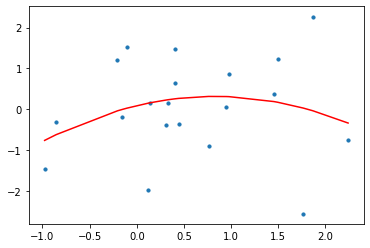

In [13]:
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='red')
plt.show()